# <center> Визуализация на Python



In [111]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

#### Краудфандинговые проекты на Kickstarter, вышедшие с 2009 по 2018 гг.

df = pd.read_csv('ks-projects-201801.csv')
df.head()

### добавляю год

def check_year(launched):
    return str(launched)[0:4]

df['year'] = df['launched'].apply(check_year)


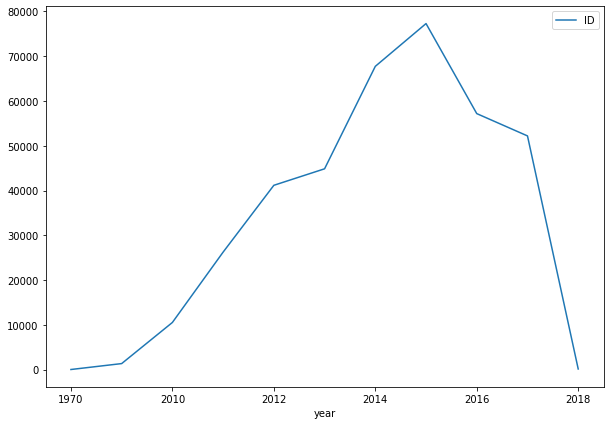

In [112]:
## кол-во проектов в разрезе годов (какой из годов был самым активным по проектам)

df.groupby('year')[['ID']].count().plot()

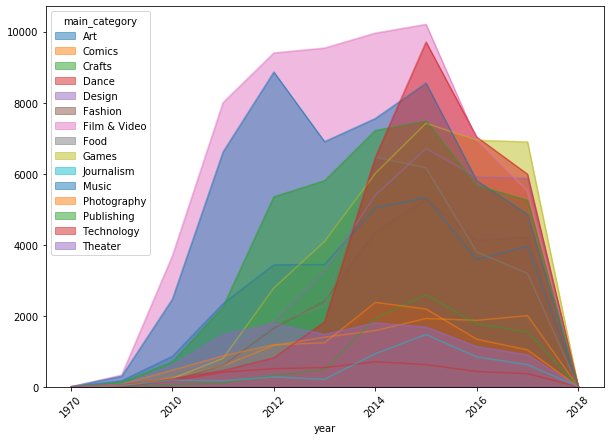

In [113]:
## кол-во проектов в разрезе годов и категорий (смотрим в какой год какая категория была на пике активности по кол-ву проектов)

df.pivot_table(index = 'year', columns = 'main_category', values = 'ID', aggfunc = 'count', 
                    fill_value = 0)[list(df_cat.columns)]\
    .plot(kind='area', rot=45, stacked=False)

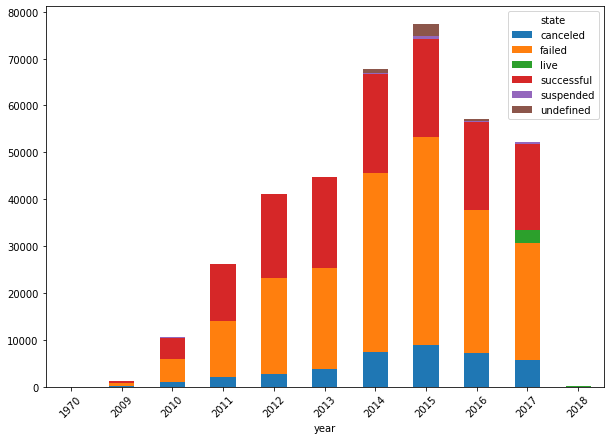

In [114]:
## накопительно по годам статусы проектов (смотри в какой год было больше всего провальных проектов или активных)

df.pivot_table(index = 'year', columns = 'state', values = 'ID', aggfunc = 'count', 
                    fill_value = 0)[list( df_states.columns)]\
    .plot(kind='bar', rot=45, stacked=True)

<BarContainer object of 10 artists>

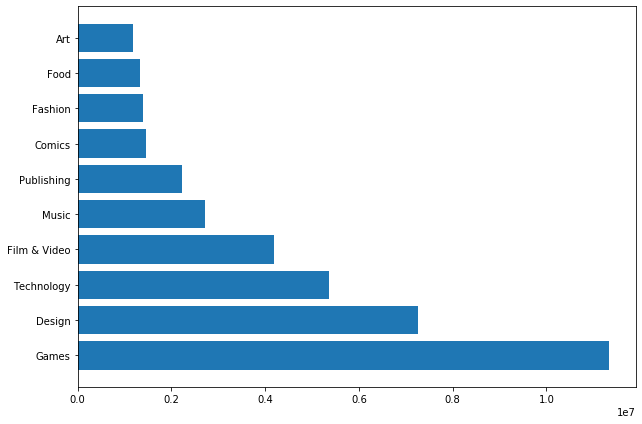

In [115]:
## топ 10 привлекательных категорий по кол-ву людей с донатами

main_category_backers = df.pivot_table(index = 'main_category', values = 'backers', aggfunc = 'sum', 
                    fill_value = 0).sort_values('backers', ascending=False).head(10).reset_index()


plt.barh(main_category_backers['main_category'], main_category_backers['backers'])

In [116]:
## топ 10 привлекательных категорий по сумме средств, переданных в поддержку (без учета проалился проект или нет)

df.groupby('main_category')[['usd_pledged_real']].sum()\
    .sort_values('usd_pledged_real', ascending=False).head(10).style.bar()

,usd_pledged_real
main_category,
Games,741327289.539998
Design,734220233.379999
Technology,688872493.679999
Film & Video,391555058.310000
Music,200318729.450000
Publishing,133575983.280000
Fashion,130335278.340000
Food,125806502.350000
Art,90680446.110000


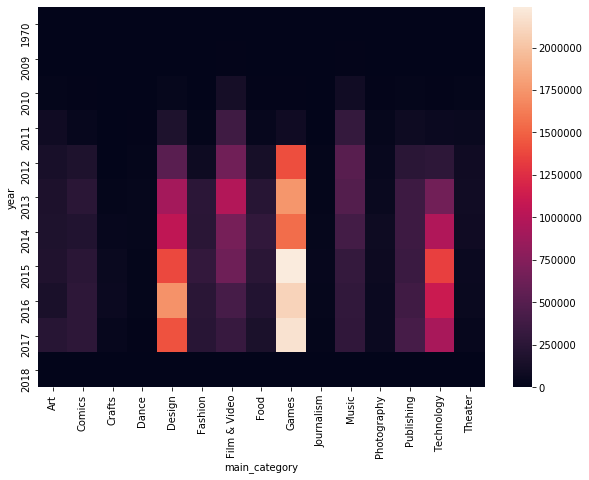

In [117]:
## тепловая карта: кол-во людей с донатами в разбивке по категории и годам

ax = sns.heatmap(df.pivot_table(index = 'year', columns = 'main_category', values = 'backers', aggfunc = 'sum', 
                    fill_value = 0))